In [1]:
import numpy as np 
import os 
import re 
import sys 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import precision_score 

In [18]:
df = pd.read_csv('read_data.csv', index_col=False)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


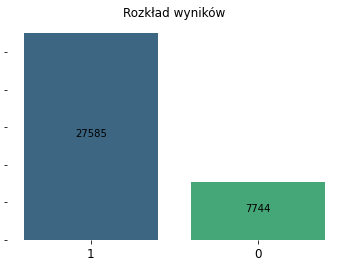

In [23]:
df = df.fillna(0) 

df.head()

fig, ax = plt.subplots()
g = sns.countplot(df['Opportunity Result'], palette='viridis')
g.set_xticklabels(['1', '0'])
g.set_yticklabels([])

#ciekawe ustawienie wartosci na wykresie
def show_values(axs):
    def show_plot(ax):
        for el in ax.patches:
            x = el.get_x() + el.get_width()/2
            y = el.get_y() + el.get_height()/2
            value = f"{el.get_height()}"
            ax.text(x,y,value, ha="center")
    
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            show_plot(ax)
    else:
        show_plot(axs)
        
show_values(ax)
sns.despine(left=True, bottom=True)
plt.title('Rozkład wyników')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.show()

In [24]:
df['Opportunity Result'].value_counts()

0    27585
1     7744
Name: Opportunity Result, dtype: int64

In [25]:
(df.loc[df['Opportunity Result'] == 1].shape[0]/df.loc[df['Opportunity Result'] == 0].shape[0] )* 100 

28.073228203733912

In [26]:
#train, test data

from sklearn.model_selection import train_test_split

In [29]:
cols = [col for col in df.columns if col not in ['Opportunity Number','Opportunity Result']]

In [30]:
y = df['Opportunity Result']
X = df[cols]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 27)

In [31]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [32]:
print(f"Labels predict {np.unique(dummy_pred)}")

Labels predict [0]


In [33]:
print(f"Score: {accuracy_score(y_test, dummy_pred)}")

Score: 0.780922728559298


In [35]:
#duzy wynik

#jak to wyglada dla innej metody

#logistic regression

In [36]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

accuracy_score(y_test, logreg_pred)

0.7816020379281065

In [37]:
#również duży wynik predykcji (dla naive bayes, kneigbors to samo było(poprzedni html))

In [38]:
pred_score = pd.DataFrame(logreg_pred)
pred_score.head()

,0
0,0
1,0
2,0
3,0
4,0


In [39]:
pred_score[0].value_counts()

0    17649
1       16
Name: 0, dtype: int64

In [ ]:
#różnica miedzy Dummy a Logistic Regresion to niecałe pół procenta na wyniku, trzeba coś z tym zrobić

f1_score(y_test, logreg_pred)

pd.DataFrame(confusion_matrix(y_test, logreg_pred))

recall_score(y_test, logreg_pred)

#możemy wywnsioskować że pomimo wyniku predykcji na poziomie 86% nie są miarodajne

#Sprawdzę jak to wygląda dla poprzednich trzech metod

type(logreg_pred)

type(y_test)

def show_scores(y_test: pd.core.series.Series, method_pred: np.ndarray, meth_name: str):
    acc_result = accuracy_score(y_test, method_pred)
    f1_result =  f1_score(y_test, method_pred)
    matrix_result = pd.DataFrame(confusion_matrix(y_test, method_pred))
    recall_result = recall_score(y_test, method_pred)
    precision_result = precision_score(y_test, method_pred)
    
    print("-"*100)
    print(f"{meth_name}")
    print("-"*100)
    print(f"accuracy: {acc_result}")
    print(f"f1 score: {f1_result}")
    print(f"confusion matrix:\n{matrix_result}")
    print(f"recal score: {recall_result}")
    print(f"precision score: {recall_result}")

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb_pred = gnb.fit(X_train,y_train).predict(X_test)

show_scores(y_test, gnb_pred, "GaussianNB")

from sklearn.svm import LinearSVC

svc_model = LinearSVC(random_state = 0)

svc_pred = svc_model.fit(X_train, y_train).predict(X_test)

show_scores(y_test, svc_pred, "LinearSVC")

from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier(n_neighbors = 2)

kn_pred = KN.fit(X_train, y_train).predict(X_test)

show_scores(y_test, kn_pred, "KNeighborsClassifier")